# 3. PyTorchにおけるテンソルの扱い方

## 3.1 浮動小数点数とは

入力データをネットワークが処理可能な情報にencodeし, 出力された情報を人間が理解できるようにdecodeする手段.

DNNは, ある形式からある形式への変換を段階的に学習する. 中間層では, 中間表現としてエッジの検出などの特徴が抽出される

PyTorchでは, データを浮動小数点数で扱うためにテンソルというデータ構造をとっている. 単にベクトルや行列, 多次元配列のことを指す.

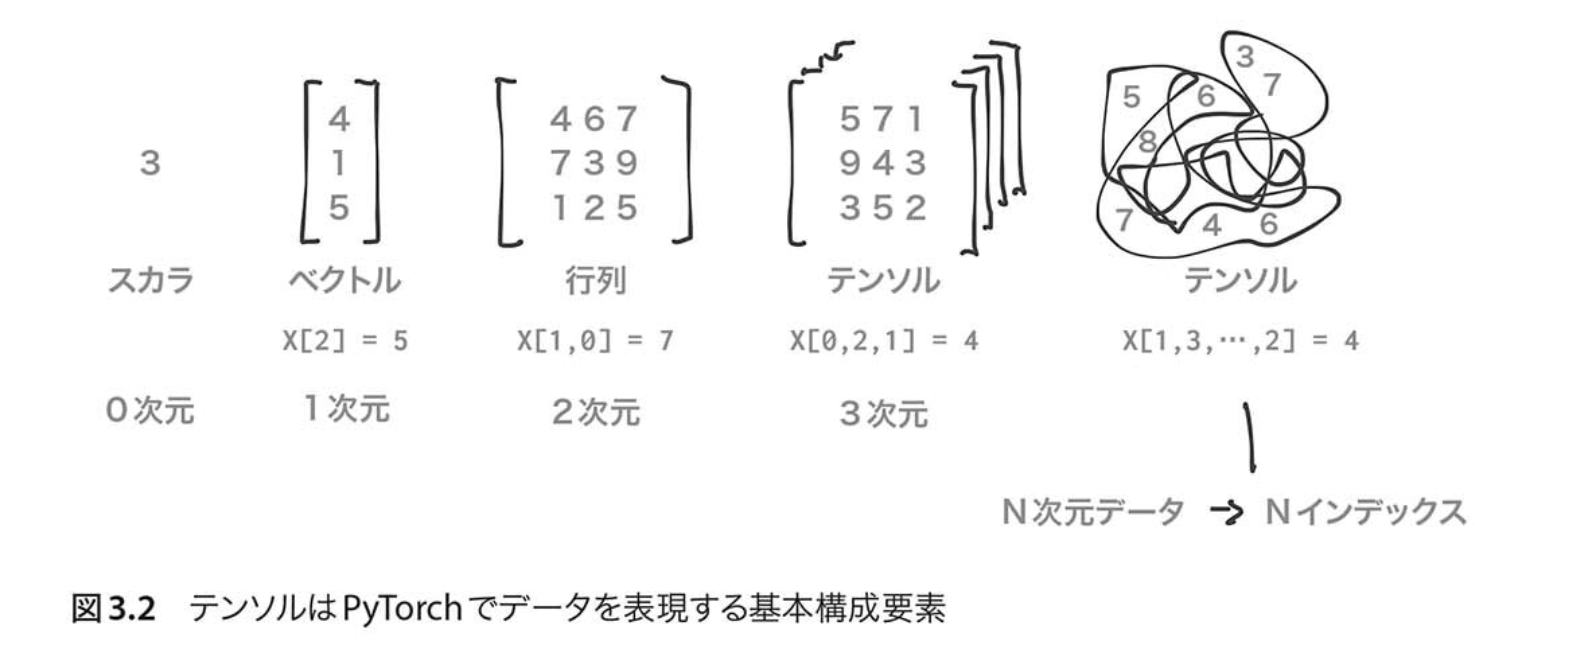

多次元配列をPython上で扱うライブラリとしてNumPyも存在する. PyTorchとNumpyはシームレスに連携できる.  
GPU上で並列演算できるのがPyTorchの強みで, 複数のデバイスやマシン上で演算を分散したり, テンソルが構築された計算グラフを追跡できるなどの機能がある

## 3.2 多次元配列としてのテンソル

### 3.2.1 Python listからPyTorch Tensor

In [2]:
# Python listを定義
a = [1.0, 2.0, 1.0]

リストのインデックスを指定することで要素にアクセスできる

In [3]:
a[0]

1.0

In [4]:
a[2] = 3.0
a

[1.0, 2.0, 3.0]

### 3.2.2 テンソルの作成

In [5]:
import torch
a = torch.ones(3)
a

tensor([1., 1., 1.])

In [7]:
a[1]

tensor(1.)

In [8]:
float(a[1])

1.0

In [9]:
a[2] = 2.0
a

tensor([1., 1., 2.])

みかけ上, Pythonのリストと同じような操作ができてPyTorchのテンソルである必要がない.

### 3.2.3 PyTorchテンソルの本質

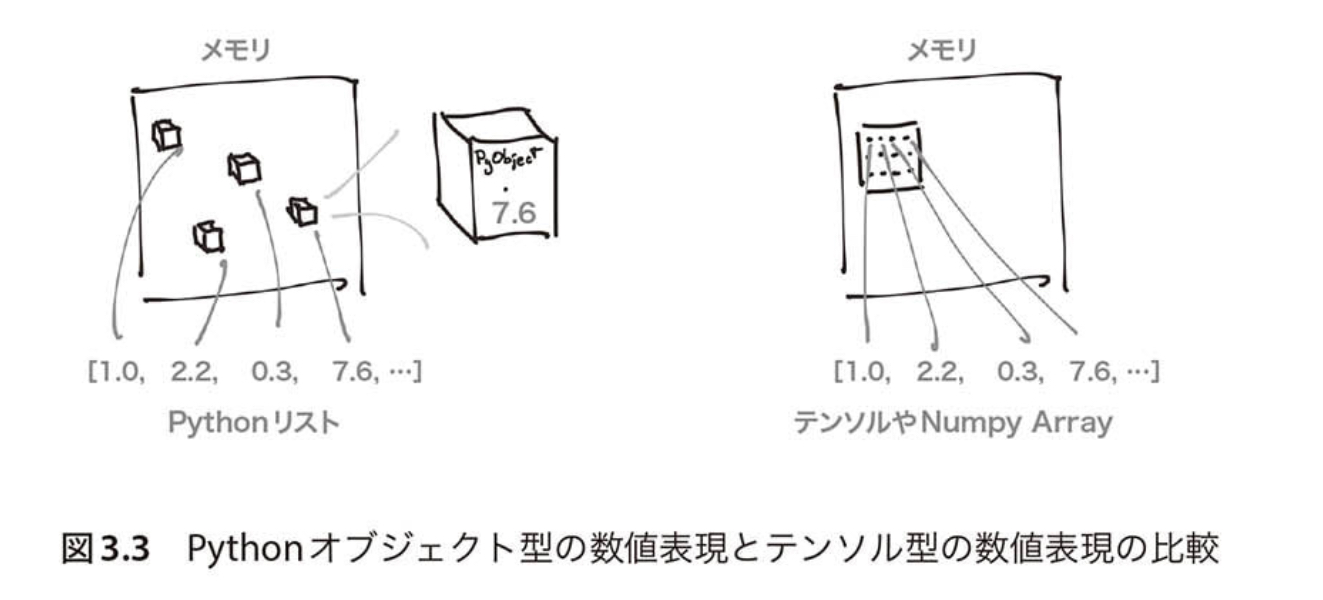

Pythonリストでは, 左のように個別にメモリに割り当てられたPythonオブジェクトの集合体である.

Torch.Tensorやnumpy配列は, Pythonオブジェクトではなく, C言語の数値型配列を含む連続したメモリブロックになっている.

つまり32bit(4byte)の浮動小数点数が100万個格納された1次元テンソルには, $1,000,000 * 4 = 4,000,000$ の連続するバイト容量が必要.

次に, 幾何学的なオブジェクトを作成するための座標リストがあると仮定  
(4, 1) (5, 3) (2, 1)を頂点とする2次元の三角形について考える.

Pythonのリストとして座標を表現するのではなく, 偶数indexにx座標, 奇数indexにY座標を格納する1次元テンソルを作成する.

In [12]:
points = torch.zeros(6)

points[0] = 4.0
points[1] = 1.0
points[2] = 5.0
points[3] = 3.0
points[4] = 2.0
points[5] = 1.0
points

tensor([4., 1., 5., 3., 2., 1.])

コンストラクタにPythonリストを渡しても同じ結果になる.

In [13]:
points = torch.tensor([4.0, 1.0, 5.0, 3.0, 2.0, 1.0])

points

tensor([4., 1., 5., 3., 2., 1.])

In [14]:
# 最初の座標を取得
float(points[0]), float(points[1])

(4.0, 1.0)

各インデックスを2次元座標にするには2次元のテンソルを利用する

In [15]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [16]:
# shapeで形状を確認
points.shape

torch.Size([3, 2])

また, サイズをタプルとして渡してテンソルを0または1で初期化して作成することもできる

In [17]:
points = torch.zeros(3, 2)
points

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

次に, 2次元のテンソルの要素に対してアクセスするために, 2つのindexを用いてみる

In [18]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [19]:
points[0, 1]

tensor(1.)

上記のコードは0番目の座標点のY座標を返す. また先ほどのように1つのindexで2次元座標を取得も可能

In [20]:
points[0]

tensor([4., 1.])

出力されたテンソルは元のテンソルとは別の形で提示されるが、メモリレベルでは同じものを指している.

## 3.3 テンソルの一部指定や取り出し(Indexing)

テンソルに対して最初の点以外の全てを取り出す必要がある場合などは, list同様にrange indexを使う

In [22]:
some_list = list(range(6))
some_list[:]  #全部指定
some_list[1:4]  # 1から4の手前まで
some_list[1:]   # 1から後ろ全部
some_list[:4]   # 最初から4の手前まで
some_list[:-1]  # 最初から一番後ろの手前まで
some_list[1:4:2]    # 1から4の手前までを2つおきに

[1, 3]

PyTorchテンソルでもnumpy同様にテンソルの次元ごとのレンジインデックス記法を使える

In [23]:
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [25]:
points[1:]  # 1行目から後ろ全ての行指定

tensor([[5., 3.],
        [2., 1.]])

In [26]:
points[1:, :]   # 1行目以降で, 列全部指定

tensor([[5., 3.],
        [2., 1.]])

In [27]:
points[1:, 0]   # 1行目以降で, 0列のものを指定

tensor([5., 2.])

In [28]:
points[None]

tensor([[[4., 1.],
         [5., 3.],
         [2., 1.]]])

## 3.4 名前付きテンソル(Named Tensor)

テンソルの各次元は, ピクセルの位置や色チャネルなどをindex化するので, 順番を覚えておくといい.